<a href="https://colab.research.google.com/github/Bagito999/Deep-Learning/blob/main/IMDb_RNN_LSTM_GRU_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Parameters
num_words = 40000
maxlen = 400

# Load & preprocess data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#Model Deep Learning RNN

In [2]:
model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    SimpleRNN(128, return_sequences=True),
    Dropout(0.3),
    SimpleRNN(64),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [3]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test)
)


Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 28s 105ms/step - accuracy: 0.4972 - loss: 0.7215 - val_accuracy: 0.5050 - val_loss: 0.6934
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 82ms/step - accuracy: 0.5844 - loss: 0.6672 - val_accuracy: 0.7895 - val_loss: 0.4926
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 92ms/step - accuracy: 0.8206 - loss: 0.4217 - val_accuracy: 0.8286 - val_loss: 0.4048
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - accuracy: 0.8828 - loss: 0.3024 - val_accuracy: 0.8036 - val_loss: 0.4375
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.8882 - loss: 0.2808 - val_accuracy: 0.7906 - val_loss: 0.5030
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 91ms/step - accuracy: 0.8591 - loss: 0.3427 - val_accuracy: 0.8066 - val_loss: 0.6847
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.8736 - loss: 0.3387 - val_accuracy: 0.8036 - val_loss: 0.4630
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.8750 - loss: 0.3145 -

782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step
Accuracy: 0.8270
Precision: 0.8261
Recall: 0.8283
F1 Squared: 0.6843
AUC: 0.8981


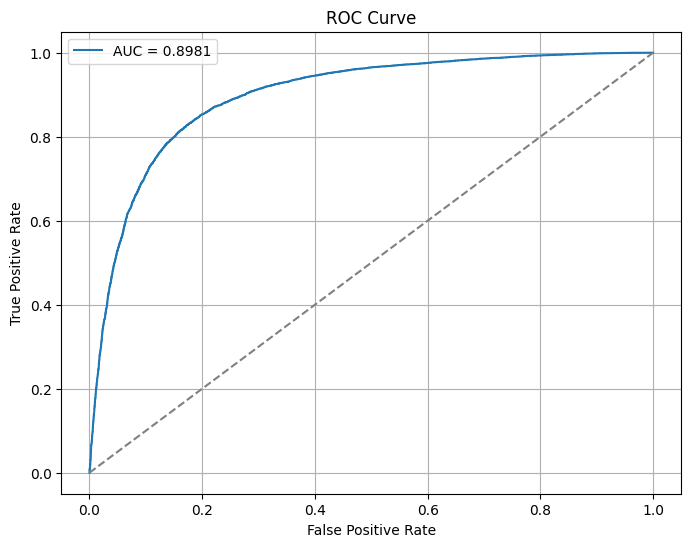

In [4]:
# Predictions
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_squared = f1_score(y_test, y_pred) ** 2
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Squared: {f1_squared:.4f}")
print(f"AUC: {auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


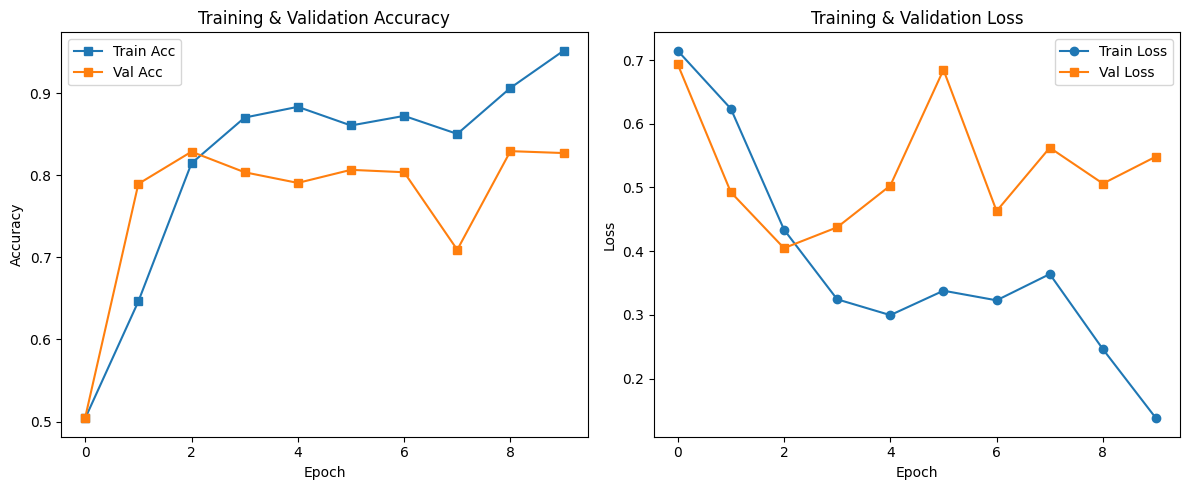

In [6]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc', marker='s')
plt.plot(history.history['val_accuracy'], label='Val Acc', marker='s')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='s')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#Model Deep Learning LSTM

In [7]:
from tensorflow.keras.layers import LSTM  # Tambahan

# Tetap gunakan ini (kalau belum dijalankan)
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 40000
maxlen = 400

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout

model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [9]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test)
)


Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 23s 79ms/step - accuracy: 0.6521 - loss: 0.6210 - val_accuracy: 0.8462 - val_loss: 0.3695
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.9101 - loss: 0.2421 - val_accuracy: 0.8724 - val_loss: 0.3049
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.9500 - loss: 0.1451 - val_accuracy: 0.8590 - val_loss: 0.4582
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.9742 - loss: 0.0825 - val_accuracy: 0.8600 - val_loss: 0.4735
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.9877 - loss: 0.0439 - val_accuracy: 0.8390 - val_loss: 0.5303
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.9894 - loss: 0.0356 - val_accuracy: 0.8552 - val_loss: 0.5984
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.9921 - loss: 0.0261 - val_accuracy: 0.8467 - val_loss: 0.8327
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 67ms/step - accuracy: 0.9881 - loss: 0.0355 - 

782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step
Accuracy: 0.8394
Precision: 0.8470
Recall: 0.8284
F1 Squared: 0.7016
AUC: 0.9145


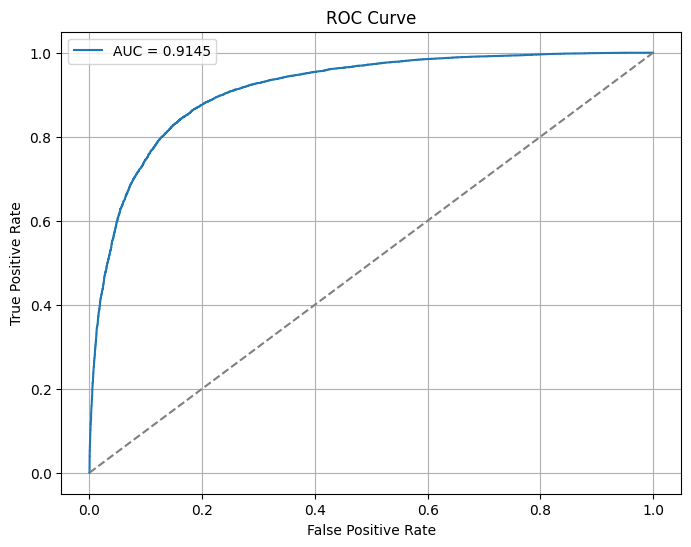

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_squared = f1_score(y_test, y_pred) ** 2
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Squared: {f1_squared:.4f}")
print(f"AUC: {auc:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


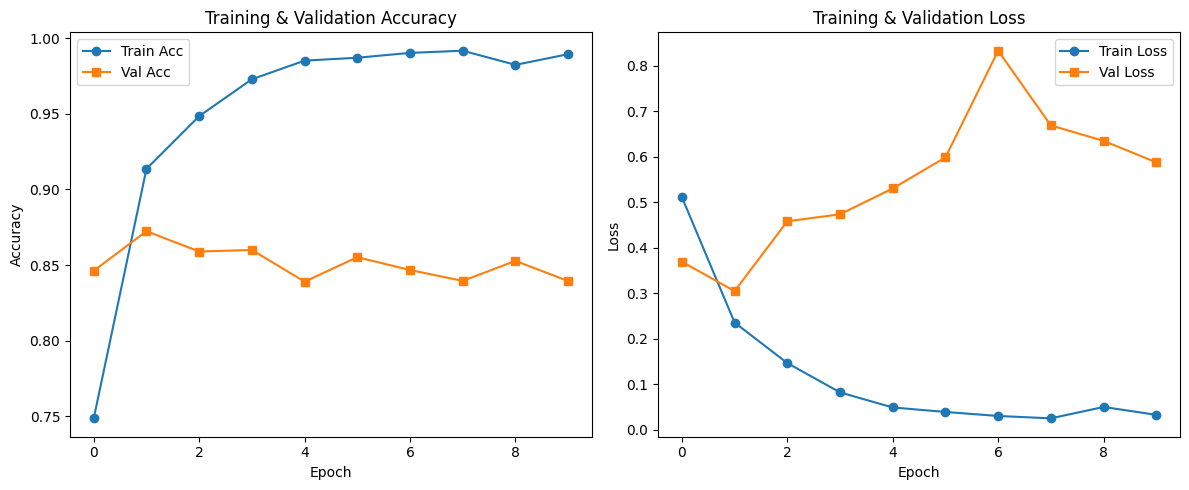

In [11]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Acc', marker='s')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='s')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#Model Deep Learning GRU

In [12]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 40000
maxlen = 400

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=maxlen),
    GRU(128, return_sequences=True),
    Dropout(0.3),
    GRU(64),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test)
)


Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - accuracy: 0.6648 - loss: 0.5892 - val_accuracy: 0.8669 - val_loss: 0.3241
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 64ms/step - accuracy: 0.9121 - loss: 0.2275 - val_accuracy: 0.8650 - val_loss: 0.3208
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.9558 - loss: 0.1324 - val_accuracy: 0.8564 - val_loss: 0.4046
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.9761 - loss: 0.0766 - val_accuracy: 0.8513 - val_loss: 0.4570
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9838 - loss: 0.0515 - val_accuracy: 0.8597 - val_loss: 0.5171
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 73ms/step - accuracy: 0.9881 - loss: 0.0367 - val_accuracy: 0.8572 - val_loss: 0.5822
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step - accuracy: 0.9941 - loss: 0.0191 - val_accuracy: 0.8486 - val_loss: 0.6073
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 63ms/step - accuracy: 0.9956 - loss: 0.0159 - 

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step
Accuracy: 0.8512
Precision: 0.8807
Recall: 0.8126
F1 Squared: 0.7145
AUC: 0.9284


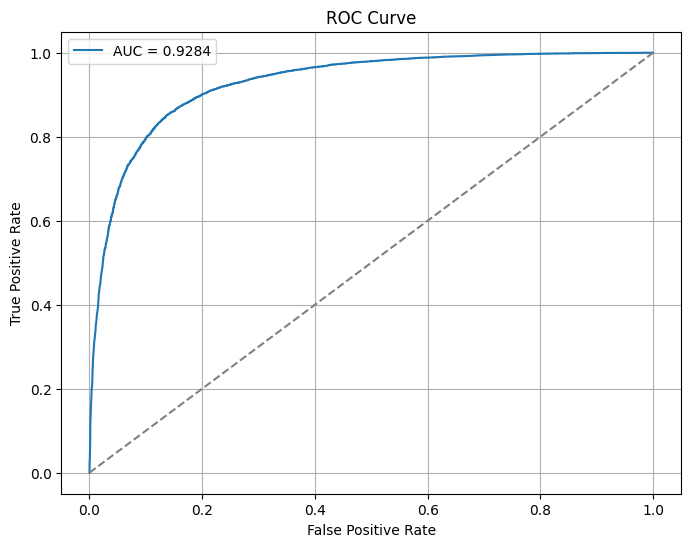

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_squared = f1_score(y_test, y_pred) ** 2
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Squared: {f1_squared:.4f}")
print(f"AUC: {auc:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


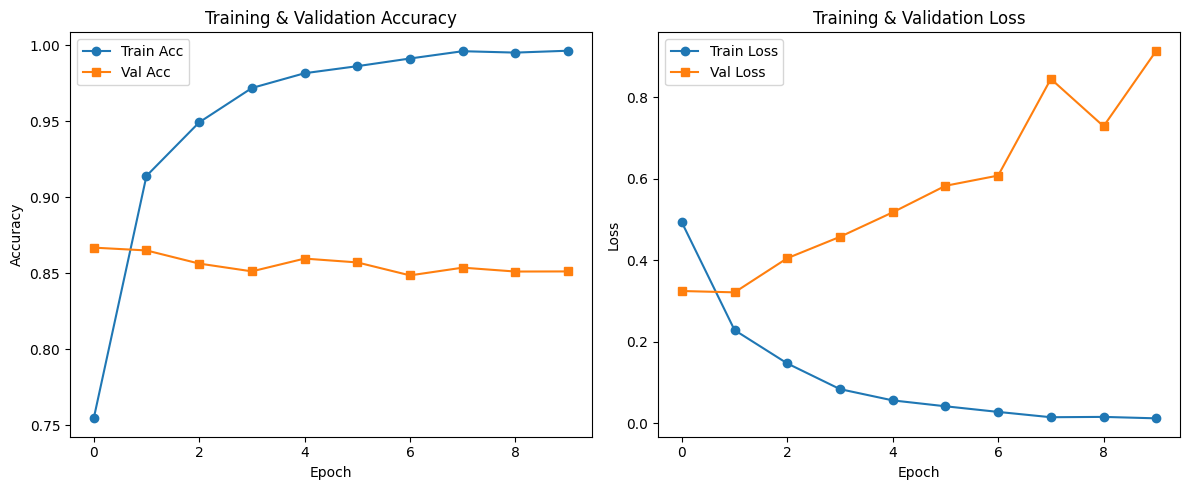

In [16]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Acc', marker='s')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='s')
plt.title('Training & Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# 📘 Penjelasan Persamaan Matematika dalam Deep Learning

---

## 🔁 1. Recurrent Neural Network (RNN)

Model RNN mempertimbangkan urutan dengan memori internal:

\[
$h_t = \tanh(W_h h_{t-1} + W_x x_t + b)$
\]

- \($ h_t $\): Hidden state saat waktu \($ t $\)
- \($ x_t $\): Input saat waktu \($ t $\)
- \($ W_h, W_x $\): Bobot hidden dan input
- \($ b $\): Bias

---

## 🔒 2. Long Short-Term Memory (LSTM)

LSTM memiliki mekanisme gate untuk menangani long-term dependency:

\[
\begin{aligned}
f_t &= \sigma(W_f [h_{t-1}, x_t] + b_f) \quad \text{(forget gate)} \\
i_t &= \sigma(W_i [h_{t-1}, x_t] + b_i) \quad \text{(input gate)} \\
\tilde{C}_t &= \tanh(W_C [h_{t-1}, x_t] + b_C) \quad \text{(candidate state)} \\
C_t &= f_t * C_{t-1} + i_t * \tilde{C}_t \quad \text{(cell state)} \\
o_t &= \sigma(W_o [h_{t-1}, x_t] + b_o) \quad \text{(output gate)} \\
h_t &= o_t * \tanh(C_t) \quad \text{(hidden state)}
\end{aligned}
\]

---

## 🔁 3. Gated Recurrent Unit (GRU)

GRU adalah versi lebih sederhana dari LSTM:

\[
\begin{aligned}
z_t &= \sigma(W_z [h_{t-1}, x_t]) \quad \text{(update gate)} \\
r_t &= \sigma(W_r [h_{t-1}, x_t]) \quad \text{(reset gate)} \\
\tilde{h}_t &= \tanh(W [r_t * h_{t-1}, x_t]) \quad \text{(candidate state)} \\
h_t &= (1 - z_t) * h_{t-1} + z_t * \tilde{h}_t \quad \text{(new state)}
\end{aligned}
\]

---

## 📉 4. Binary Cross-Entropy Loss

Untuk klasifikasi biner, fungsi loss adalah:

\[
\$mathcal{L} = -\frac{1}{N} \sum_{i=1}^{N} \left[y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)\right]
$\]

- \($ y_i $\): Label sebenarnya (0 atau 1)
- \($ \hat{y}_i $\): Prediksi model

---

## 🧮 5. Evaluasi Model

**Akurasi:**

\[
$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$
\]

Keterangan:
- **TP** = True Positive
- **TN** = True Negative
- **FP** = False Positive
- **FN** = False Negative

**Presisi:**

\[$
\text{Precision} = \frac{TP}{TP + FP}
$\]

**Recall:**

\[$
\text{Recall} = \frac{TP}{TP + FN}
$\]

**F1 Score:**

\[$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$\]

**F1 Squared:**

\[$
F1^2 = (F1)^2
$\]

**AUC (Area Under Curve):** Luas di bawah kurva ROC yang menggambarkan trade-off antara TPR dan FPR.

**ROC Curve:** Grafik yang menunjukkan hubungan antara TPR (True Positive Rate) dan FPR (False Positive Rate).

---

